## Wczytanie danych

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://pwozniak.kia.prz.edu.pl/files/uczeniemaszynowe/train_data.csv')

## Eksploracja danych

In [11]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,59,Arcanine,Fire,NaN,555,82,110,88,105,72,98,1,False
1,107,Hitmonchan,Fighting,NaN,455,47,97,84,27,121,79,1,False
2,123,Scyther,Bug,Flying,500,63,113,86,56,73,109,1,False
3,35,Clefairy,Fairy,NaN,323,67,54,46,58,62,36,1,False
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,97,193,102,157,98,133,1,True


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3320 entries, 0 to 3319
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           3320 non-null   int64 
 1   Name        3320 non-null   object
 2   Type 1      3320 non-null   object
 3   Type 2      1560 non-null   object
 4   Total       3320 non-null   int64 
 5   HP          3320 non-null   int64 
 6   Attack      3320 non-null   int64 
 7   Defense     3320 non-null   int64 
 8   Sp. Atk     3320 non-null   int64 
 9   Sp. Def     3320 non-null   int64 
 10  Speed       3320 non-null   int64 
 11  Generation  3320 non-null   int64 
 12  Legendary   3320 non-null   bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 314.6+ KB


In [13]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,3320.000000,3320.000000,3320.000000,3320.000000,3320.000000,3320.000000,3320.000000,3320.000000,3320.0
mean,75.819277,426.813253,65.925000,76.491867,70.749398,71.862048,69.129217,72.655723,1.0
std,45.023818,115.545921,28.591967,31.307924,29.011751,34.865423,26.255710,30.095827,0.0
min,1.000000,195.000000,-1.000000,-1.000000,-1.000000,5.000000,10.000000,5.000000,1.0
25%,36.000000,325.000000,47.000000,54.000000,50.000000,46.000000,49.000000,49.000000,1.0
50%,76.500000,436.500000,62.000000,74.000000,67.000000,65.000000,70.000000,71.000000,1.0
75%,115.000000,500.000000,81.000000,96.000000,87.000000,94.000000,88.000000,93.000000,1.0
max,151.000000,780.000000,255.000000,199.000000,189.000000,202.000000,137.000000,159.000000,1.0


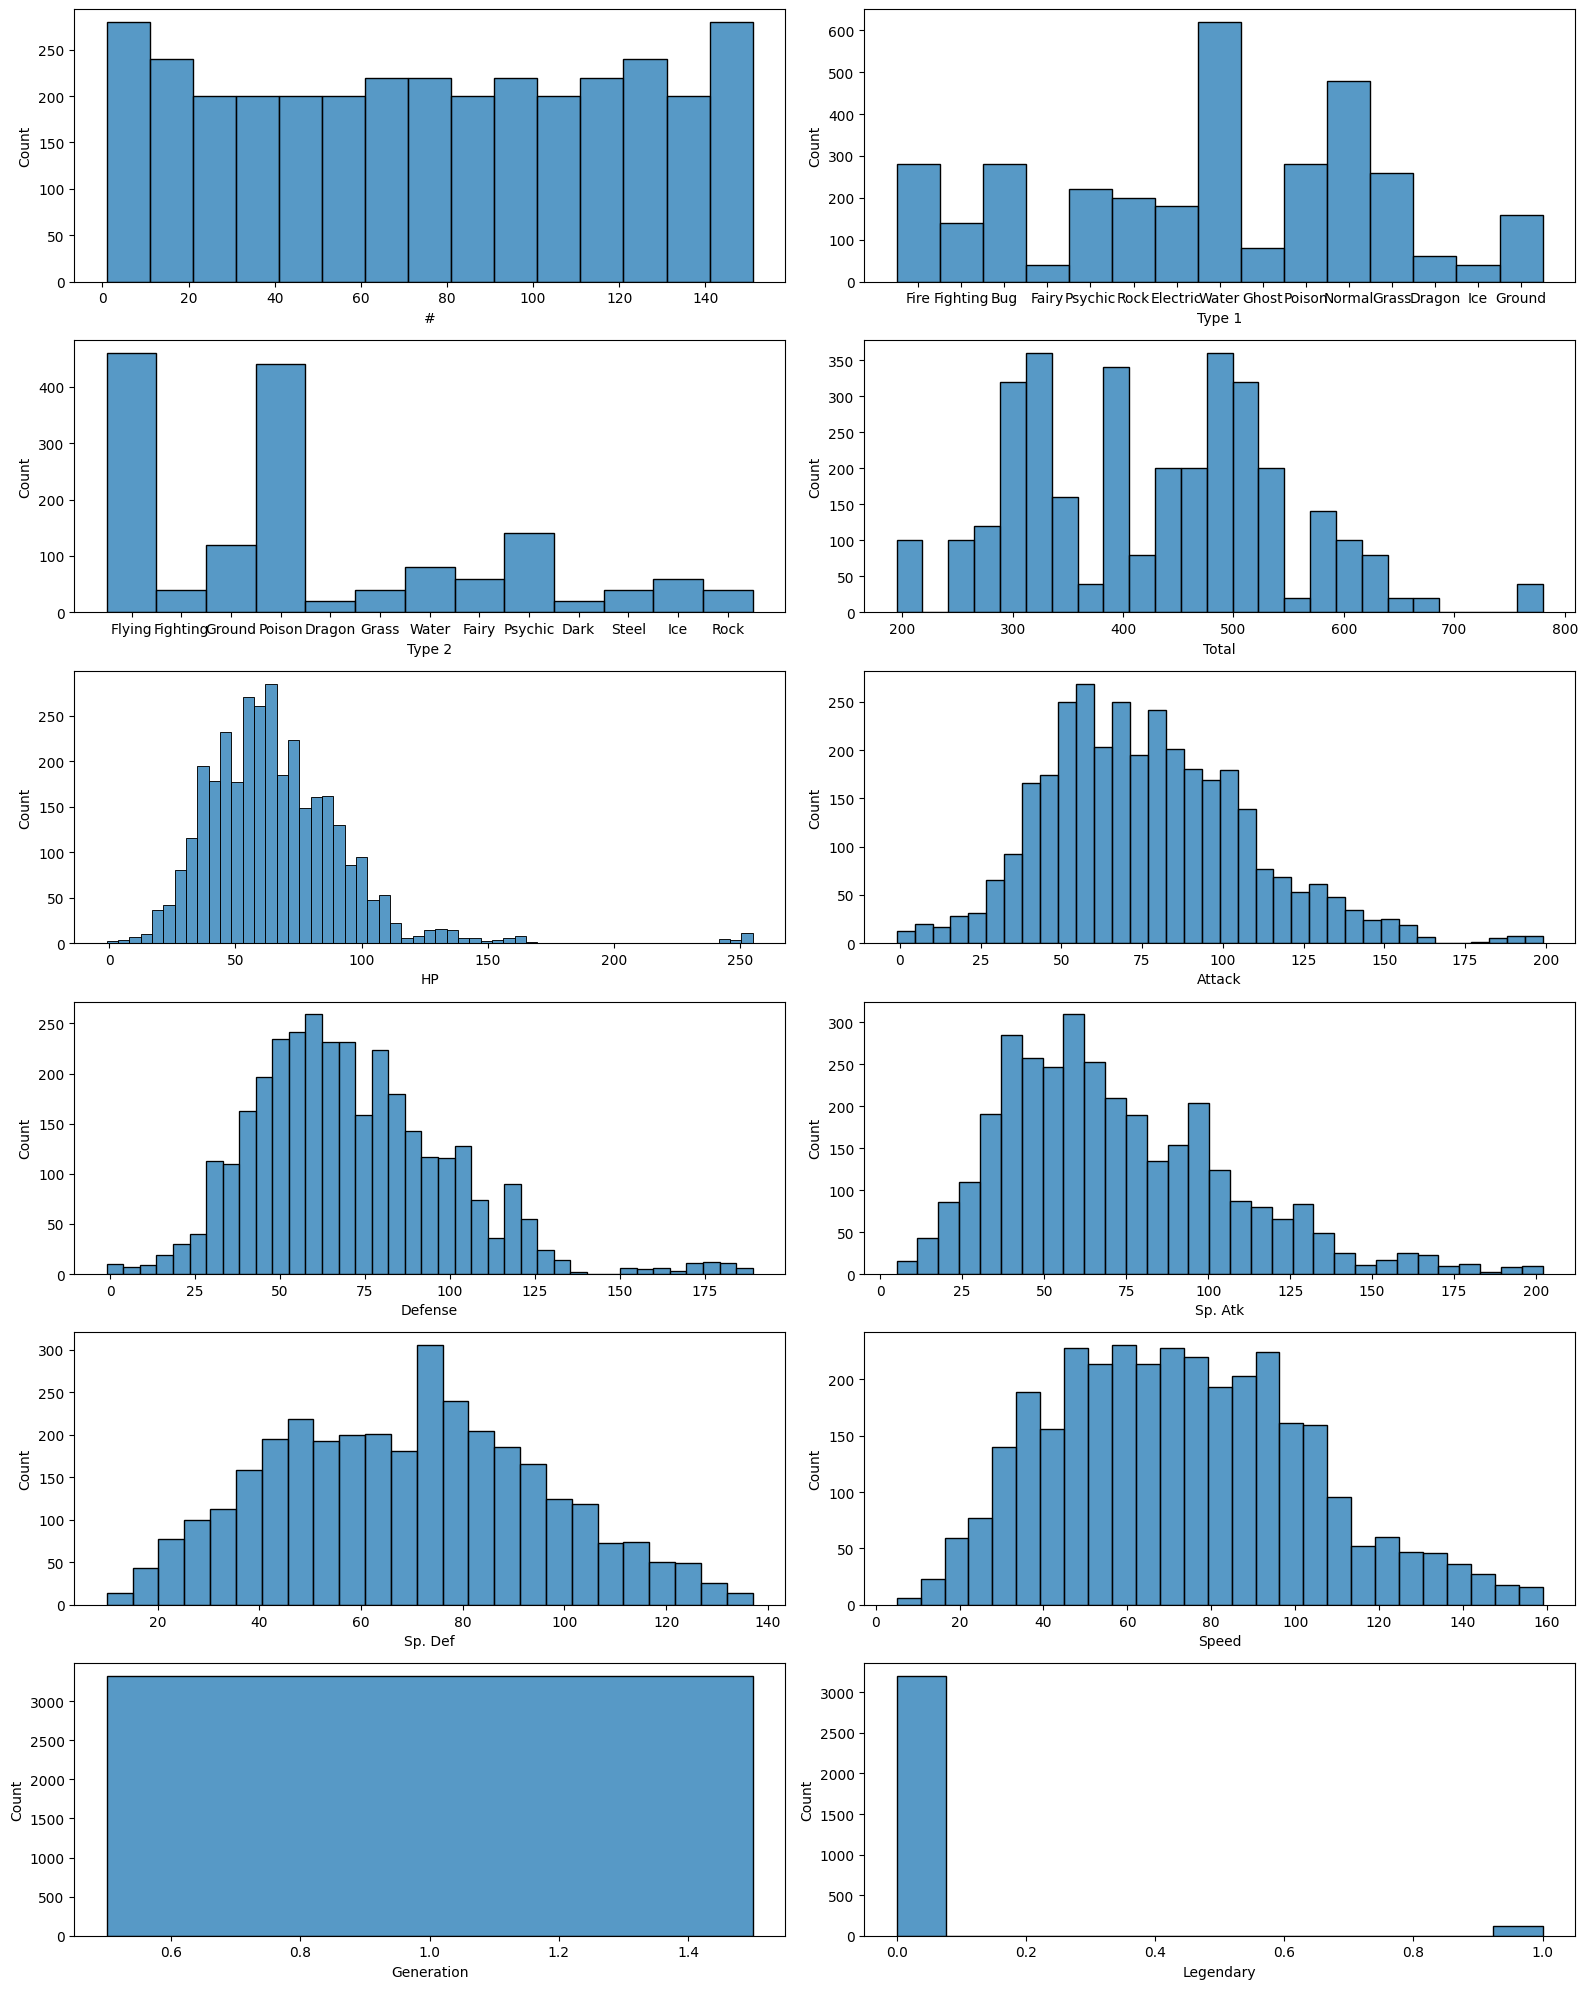

In [14]:
plt.figure(figsize=(16, 20))
columns = [column for column in df.columns if column != 'Name']
for i, column in enumerate(columns):
    plt.subplot(6, 2, i + 1)
    sns.histplot(data=df, x=column)

plt.tight_layout()
plt.show()

## Przetwarzanie danych

### Wykrywanie i obsługa brakujących wartości

In [15]:
for column in df.columns:
    print(f"Liczba brakujących danych dla {column}: {sum(df.isna()[column])}")

Liczba brakujących danych dla #: 0
Liczba brakujących danych dla Name: 0
Liczba brakujących danych dla Type 1: 0
Liczba brakujących danych dla Type 2: 1760
Liczba brakujących danych dla Total: 0
Liczba brakujących danych dla HP: 0
Liczba brakujących danych dla Attack: 0
Liczba brakujących danych dla Defense: 0
Liczba brakujących danych dla Sp. Atk: 0
Liczba brakujących danych dla Sp. Def: 0
Liczba brakujących danych dla Speed: 0
Liczba brakujących danych dla Generation: 0
Liczba brakujących danych dla Legendary: 0


In [16]:
df.fillna("Absence", inplace=True)

In [17]:
for column in df.columns:
    print(f"Liczba brakujących danych dla {column}: {sum(df.isna()[column])}")

Liczba brakujących danych dla #: 0
Liczba brakujących danych dla Name: 0
Liczba brakujących danych dla Type 1: 0
Liczba brakujących danych dla Type 2: 0
Liczba brakujących danych dla Total: 0
Liczba brakujących danych dla HP: 0
Liczba brakujących danych dla Attack: 0
Liczba brakujących danych dla Defense: 0
Liczba brakujących danych dla Sp. Atk: 0
Liczba brakujących danych dla Sp. Def: 0
Liczba brakujących danych dla Speed: 0
Liczba brakujących danych dla Generation: 0
Liczba brakujących danych dla Legendary: 0


In [18]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,59,Arcanine,Fire,Absence,555,82,110,88,105,72,98,1,False
1,107,Hitmonchan,Fighting,Absence,455,47,97,84,27,121,79,1,False
2,123,Scyther,Bug,Flying,500,63,113,86,56,73,109,1,False
3,35,Clefairy,Fairy,Absence,323,67,54,46,58,62,36,1,False
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,97,193,102,157,98,133,1,True


### Usuwanie duplikatów

In [19]:
print(f"Liczba zduplikowanych wierszy: {sum(df.duplicated())}")

Liczba zduplikowanych wierszy: 0


### Sortowanie na podstawie numeru pokemona

In [20]:
df = df.sort_values('#').reset_index(drop=True)

In [21]:
df.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,52,58,52,48,49,59,1,False
1,1,Bulbasaur,Grass,Poison,318,47,46,40,62,70,53,1,False
2,1,Bulbasaur,Grass,Poison,318,55,53,58,45,56,51,1,False
3,1,Bulbasaur,Grass,Poison,318,40,44,43,74,62,55,1,False
4,1,Bulbasaur,Grass,Poison,318,35,54,56,59,72,42,1,False
5,1,Bulbasaur,Grass,Poison,318,45,53,63,67,42,48,1,False
6,1,Bulbasaur,Grass,Poison,318,55,65,47,52,53,46,1,False
7,1,Bulbasaur,Grass,Poison,318,42,51,42,76,68,39,1,False
8,1,Bulbasaur,Grass,Poison,318,37,47,58,68,57,51,1,False
9,1,Bulbasaur,Grass,Poison,318,44,55,40,69,61,49,1,False


In [22]:
df.tail(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
3310,151,Mew,Psychic,Absence,600,98,92,97,100,105,108,1,False
3311,151,Mew,Psychic,Absence,600,104,98,101,103,102,92,1,False
3312,151,Mew,Psychic,Absence,600,104,104,107,96,91,98,1,False
3313,151,Mew,Psychic,Absence,600,105,103,103,93,101,95,1,False
3314,151,Mew,Psychic,Absence,600,105,96,103,99,104,93,1,False
3315,151,Mew,Psychic,Absence,600,100,95,103,103,101,98,1,False
3316,151,Mew,Psychic,Absence,600,107,107,98,96,94,98,1,False
3317,151,Mew,Psychic,Absence,600,87,91,105,106,107,104,1,False
3318,151,Mew,Psychic,Absence,600,102,105,92,101,107,93,1,False
3319,151,Mew,Psychic,Absence,600,100,105,108,97,99,91,1,False


## Analiza danych

### Grupowanie danych według typu Pokemona. Wyznaczenie średnich statystyk dla każdego typu pokemona

In [24]:
df.groupby(["Type 1", "Type 2"]).agg({'Total' : ['mean', 'std'], 'HP' : ['mean', 'std'], 'Attack' : ['mean', 'std'], 'Defense' : ['mean', 'std'], 
                                      'Sp. Atk' : ['mean', 'std'], 'Speed' : ['mean', 'std'], 'Legendary' : 'sum'})

Total                      HP                 Attack  \
                         mean         std        mean        std        mean   
Type 1   Type 2                                                                
Bug      Absence   300.000000  142.674217   53.183333   9.975379   57.866667   
         Flying    498.333333   84.405532   64.916667   6.287711  103.450000   
         Grass     345.000000   60.764362   47.800000  14.754747   82.775000   
         Poison    340.833333  115.679093   58.525000  12.323348   69.641667   
Dragon   Absence   360.000000   60.764362   51.400000  11.922399   73.175000   
         Flying    600.000000    0.000000   91.300000   5.768335  135.100000   
Electric Absence   438.333333   81.821011   54.208333  13.307542   62.366667   
         Flying    580.000000    0.000000   87.700000   4.995788   91.550000   
         Steel     395.000000   70.891756   38.525000  13.004905   45.975000   
Fairy    Absence   403.000000   81.019149   83.000000  13.585437   56.325000   
Fighting Absence   412.142857   73.104692   63.500000  17.458893  102.728571   
Fire     Absence   435.300000   88.735449   59.830000  15.827941   82.565000   
         Dragon    634.000000    0.000000   77.300000   5.242539  130.550000   
         Flying    582.666667   41.213239   82.066667   8.100778   94.816667   
Ghost    Poison    453.750000  108.579726   48.050000  14.101710   54.112500   
Grass    Absence   435.000000    0.000000   66.750000   6.373258   53.750000   
         Poison    425.800000   99.782477   64.180000  14.670848   75.290000   
         Psychic   422.500000   98.742088   78.700000  19.396272   67.350000   
Ground   Absence   360.833333   69.295171   47.675000  20.997864   74.008333   
         Rock      415.000000   70.891756   94.325000  11.793930  106.225000   
Ice      Flying    580.000000    0.000000   88.900000   5.128866   85.100000   
         Psychic   455.000000    0.000000   64.100000   6.496153   51.800000   
Normal   Absence   411.461538   98.869764   87.850000  57.639311   69.550000   
         Fairy     352.500000   83.550998  128.425000  13.887621   56.750000   
         Flying    387.111111  103.783665   57.838889  17.895464   74.833333   
Poison   Absence   365.900000   80.131111   61.480000  19.903274   71.665000   
         Flying    350.000000  106.337634   57.450000  18.903195   62.700000   
         Ground    505.000000    0.000000   85.250000   7.073787   97.725000   
Psychic  Absence   519.000000  150.092709   70.094444  28.803068   70.033333   
         Fairy     460.000000    0.000000   40.550000   4.978639   45.650000   
         Fighting  780.000000    0.000000  105.600000   5.295480  190.350000   
Rock     Flying    565.000000   50.636968   81.675000   6.358469  119.275000   
         Ground    392.500000   69.582844   51.750000  17.860571   85.112500   
         Water     425.000000   70.441645   49.100000  18.491599   74.087500   
Water    Absence   388.631579  104.777795   56.194737  26.234561   66.784211   
         Dark      640.000000    0.000000   94.600000   4.816638  154.850000   
         Fighting  510.000000    0.000000   90.050000   6.353408   95.400000   
         Flying    540.000000    0.000000   95.050000   5.010253  124.650000   
         Ice       511.666667   26.468188   88.366667  34.159629   84.550000   
         Poison    425.000000   91.146543   59.800000  20.337158   53.700000   
         Psychic   478.750000  101.904336   86.187500  15.650530   73.100000   

                                 Defense                Sp. Atk             \
                         std        mean        std        mean        std   
Type 1   Type 2                                                              
Bug      Absence   48.548584   63.216667  27.519541   33.150000  16.549694   
         Flying    45.062452   82.833333  29.030181   69.600000  13.873765   
         Grass     13.625932   67.975000  13.916394   52.450000   9.708442   
         Poison    41.215930   44.8

### Analiza liczby wierszy o każdym pokemonie (nazwie)

In [25]:
grouped_names = df.groupby('Name').agg(number_of_pokemons = ('Generation', 'count'))
grouped_names.head(10)

,number_of_pokemons
Name,
Abra,20
Aerodactyl,20
AerodactylMega Aerodactyl,20
Alakazam,20
AlakazamMega Alakazam,20
Arbok,20
Arcanine,20
Articuno,20
Beedrill,20


In [26]:
grouped_names.tail(10)

,number_of_pokemons
Name,
Vileplume,20
Voltorb,20
Vulpix,20
Wartortle,20
Weedle,20
Weepinbell,20
Weezing,20
Wigglytuff,20
Zapdos,20


In [27]:
print(f"Minimalna liczba pokemonów: {np.min(grouped_names)}")
print(f"Średnia liczba pokemonów: {np.mean(grouped_names)}")
print(f"Maksymalna liczba pokemonów: {np.max(grouped_names)}")

Minimalna liczba pokemonów: 20
Średnia liczba pokemonów: 20.0
Maksymalna liczba pokemonów: 20


### Wyznaczenie liczby błędnych danych

In [28]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,52,58,52,48,49,59,1,False
1,1,Bulbasaur,Grass,Poison,318,47,46,40,62,70,53,1,False
2,1,Bulbasaur,Grass,Poison,318,55,53,58,45,56,51,1,False
3,1,Bulbasaur,Grass,Poison,318,40,44,43,74,62,55,1,False
4,1,Bulbasaur,Grass,Poison,318,35,54,56,59,72,42,1,False


In [29]:
df[df.Total != df.HP + df.Attack + df.Defense + df['Sp. Atk'] + df['Sp. Def'] + df.Speed]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary


In [30]:
columns = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
for column in columns:
    print(f"Wiersze w {column} które mają wartość poniżej lub równe 0: {len(df[df[column] <= 0])}")

Wiersze w Total które mają wartość poniżej lub równe 0: 0
Wiersze w HP które mają wartość poniżej lub równe 0: 1
Wiersze w Attack które mają wartość poniżej lub równe 0: 3
Wiersze w Defense które mają wartość poniżej lub równe 0: 8
Wiersze w Sp. Atk które mają wartość poniżej lub równe 0: 0
Wiersze w Sp. Def które mają wartość poniżej lub równe 0: 0
Wiersze w Speed które mają wartość poniżej lub równe 0: 0


In [31]:
df[(df.HP <= 0) | (df.Attack <= 0) | (df.Defense <= 0)] 

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
1118,50,Diglett,Ground,Absence,265,-1,56,34,26,50,100,1,False
2420,113,Chansey,Normal,Absence,450,250,10,-1,43,101,47,1,False
2422,113,Chansey,Normal,Absence,450,253,3,-1,36,113,46,1,False
2423,113,Chansey,Normal,Absence,450,243,12,0,42,105,48,1,False
2427,113,Chansey,Normal,Absence,450,254,-1,7,35,115,40,1,False
2428,113,Chansey,Normal,Absence,450,250,1,-1,30,113,57,1,False
2432,113,Chansey,Normal,Absence,450,247,0,9,26,108,60,1,False
2433,113,Chansey,Normal,Absence,450,255,4,0,31,115,45,1,False
2434,113,Chansey,Normal,Absence,450,243,5,-1,43,113,47,1,False
2435,113,Chansey,Normal,Absence,450,255,1,0,40,110,44,1,False


### Wyznaczenie średnich statystyk dla każdego gatunku pokemona

In [72]:
df.groupby('Name').agg({'Total' : ['mean', 'median', 'std'], 'HP' : ['mean','median', 'std'], 'Attack' : ['mean', 'median','std'], 
                      'Defense' : ['mean', 'median','std'], 'Sp. Atk' : ['mean', 'median','std'], 'Speed' : ['mean', 'median','std'], 
                      'Legendary' : 'sum'})

Total                  HP                   Attack  \
                            mean median  std    mean median       std    mean   
Name                                                                            
Abra                       310.0  310.0  0.0   23.35   22.5  7.278483   19.30   
Aerodactyl                 515.0  515.0  0.0   82.15   83.5  6.098102  105.85   
AerodactylMega Aerodactyl  615.0  615.0  0.0   81.20   83.5  6.732482  132.70   
Alakazam                   500.0  500.0  0.0   55.65   57.0  6.209288   49.55   
AlakazamMega Alakazam      590.0  590.0  0.0   55.10   54.5  5.340018   50.00   
...                          ...    ...  ...     ...    ...       ...     ...   
Weepinbell                 390.0  390.0  0.0   65.40   65.0  5.834561   88.65   
Weezing                    490.0  490.0  0.0   62.25   61.5  5.230226   92.65   
Wigglytuff                 435.0  435.0  0.0  140.95  141.0  4.968056   71.90   
Zapdos                     580.0  580.0  0.0   87.70   88.5  4.995788   91.55   
Zubat                      245.0  245.0  0.0   39.45   39.0  5.623962   46.10   

                                           Defense                  Sp. Atk  \
                          median       std    mean median       std    mean   
Name                                                                          
Abra                        20.0  6.358583   17.05   17.5  6.227908  107.80   
Aerodactyl                 106.5  6.251526   64.05   67.5  6.840091   59.20   
AerodactylMega Aerodactyl  133.0  5.849876   86.35   85.5  5.343712   70.35   
Alakazam                    50.0  4.978639   44.90   44.5  5.590405  136.55   
AlakazamMega Alakazam       50.5  6.087087   64.45   63.0  5.780867  173.95   
...                          ...       ...     ...    ...       ...     ...   
Weepinbell                  87.5  4.771351   50.20   49.5  5.634480   83.50   
Weezing                     94.0  4.997631  122.05  123.5  3.845366   85.25   
Wigglytuff                  72.0  5.775629   45.75   46.5  6.016425   84.10   
Zapdos                      93.0  6.476476   84.85   85.5  3.572924  127.25   
Zubat                       47.0  4.822098   36.90   36.5  4.689294   29.40   

                                             Speed                  Legendary  
                          median       std    mean median       std       sum  
Name                                                                           
Abra                       107.5  6.057618   90.35   90.0  3.990449         0  
Aerodactyl                  58.5  5.952443  129.00  129.0  3.769685         0  
AerodactylMega Aerodactyl   70.0  5.402485  148.10  147.0  6.315395         0  
Alakazam                   137.0  5.576973  118.90  119.5  5.901828         0  
AlakazamMega Alakazam      176.0  6.778255  149.10  149.5  6.120715         0  
...                          ...       ...     ...    ...       ...       ...  
Weepinbell                  81.0  6.286996   56.20   58.0  6.841053         0  
Weezing                     84.0  4.940435   60.85   61.5  5.254322         0  
Wigglytuff                  84.0  5.408570   43.30   42.5  4.657761         0  
Zapdos                     129.0  5.793599   98.45   98.5  6.004165        20  
Zubat                       31.0  5.413434   54.90   56.0  6.155015         0  

[166 rows x 19 columns]

### Wyznaczenie średnich statystyk dla każdego typu pokemona

In [73]:
df.groupby(['Type 1', 'Type 2']).agg({'Total' : ['mean', 'median', 'std'], 'HP' : ['mean','median', 'std'], 'Attack' : ['mean', 'median','std'], 
                      'Defense' : ['mean', 'median','std'], 'Sp. Atk' : ['mean', 'median','std'], 'Speed' : ['mean', 'median','std'], 
                      'Legendary' : 'sum'})

Total                             HP         \
                         mean median         std        mean median   
Type 1   Type 2                                                       
Bug      Absence   300.000000  205.0  142.674217   53.183333   53.0   
         Flying    498.333333  500.0   84.405532   64.916667   64.0   
         Grass     345.000000  345.0   60.764362   47.800000   47.5   
         Poison    340.833333  350.0  115.679093   58.525000   63.0   
Dragon   Absence   360.000000  360.0   60.764362   51.400000   51.0   
         Flying    600.000000  600.0    0.000000   91.300000   91.5   
Electric Absence   438.333333  482.5   81.821011   54.208333   56.5   
         Flying    580.000000  580.0    0.000000   87.700000   88.5   
         Steel     395.000000  395.0   70.891756   38.525000   39.5   
Fairy    Absence   403.000000  403.0   81.019149   83.000000   82.0   
Fighting Absence   412.142857  455.0   73.104692   63.500000   61.0   
Fire     Absence   435.300000  452.5   88.735449   59.830000   59.5   
         Dragon    634.000000  634.0    0.000000   77.300000   77.5   
         Flying    582.666667  580.0   41.213239   82.066667   83.5   
Ghost    Poison    453.750000  452.5  108.579726   48.050000   51.0   
Grass    Absence   435.000000  435.0    0.000000   66.750000   67.0   
         Poison    425.800000  400.0   99.782477   64.180000   65.0   
         Psychic   422.500000  422.5   98.742088   78.700000   76.5   
Ground   Absence   361.638655  405.0   69.021948   48.084034   51.0   
         Rock      415.000000  415.0   70.891756   94.325000   93.5   
Ice      Flying    580.000000  580.0    0.000000   88.900000   89.0   
         Psychic   455.000000  455.0    0.000000   64.100000   64.0   
Normal   Absence   409.759036  413.0  100.697678   80.662651   66.0   
         Fairy     352.500000  352.5   83.550998  128.425000  129.5   
         Flying    387.111111  352.0  103.783665   57.838889   57.0   
Poison   Absence   365.900000  352.5   80.131111   61.480000   59.0   
         Flying    350.000000  350.0  106.337634   57.450000   56.0   
         Ground    505.000000  505.0    0.000000   85.250000   86.0   
Psychic  Absence   519.000000  500.0  150.092709   70.094444   63.0   
         Fairy     460.000000  460.0    0.000000   40.550000   41.0   
         Fighting  780.000000  780.0    0.000000  105.600000  105.5   
Rock     Flying    565.000000  565.0   50.636968   81.675000   83.5   
         Ground    392.500000  387.5   69.582844   51.750000   47.0   
         Water     425.000000  425.0   70.441645   49.100000   47.0   
Water    Absence   388.631579  340.0  104.777795   56.194737   53.0   
         Dark      640.000000  640.0    0.000000   94.600000   96.0   
         Fighting  510.000000  510.0    0.000000   90.050000   92.5   
         Flying    540.000000  540.0    0.000000   95.050000   95.5   
         Ice       511.666667  525.0   26.468188   88.366667   87.5   
         Poison    425.000000  425.0   91.146543   59.800000   58.5   
         Psychic   478.750000  505.0  101.904336   86.187500   91.0   

                                  Attack                       Defense         \
                         std        mean median        std        mean median   
Type 1   Type 2                                                                 
Bug      Absence    9.975379   57.866667   30.5  48.548584   63.216667   55.0   
         Flying     6.287711  103.450000  109.0  45.062452   82.833333   80.0   
         Grass     14.754747   82.775000   81.0  13.625932   67.975000   70.0   
         Poison    12.323348   69.641667   61.0  41.215930   44.808333   45.0   
Dragon   Absence   11.922399   73.175000   76.5  12.027506   55.025000   57.0   
         Flying     5.768335  135.100000  136.0   5.972745   93.950000   93.0   
Electric Absence   13.307542   62.366667   60.5  21.400516   55.208333   54.0   
         Flying     4.995788   91.550000   93.0   6.476476   84.850000   85.5   
        

### Analiza statystyk bojowych.

In [34]:
columns = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
df[columns].agg(['mean', 'median', 'std', 'min', 'max', 'var', 'skew', 'kurt'])

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
mean,426.813253,65.925000,76.491867,70.749398,71.862048,69.129217,72.655723
median,436.500000,62.000000,74.000000,67.000000,65.000000,70.000000,71.000000
std,115.545921,28.591967,31.307924,29.011751,34.865423,26.255710,30.095827
min,195.000000,-1.000000,-1.000000,-1.000000,5.000000,10.000000,5.000000
max,780.000000,255.000000,199.000000,189.000000,202.000000,137.000000,159.000000
var,13350.859963,817.500550,980.186135,841.681681,1215.597716,689.362328,905.758810
skew,0.274332,1.976656,0.537243,0.807674,0.861858,0.139573,0.347478
kurt,-0.204162,9.654187,0.500593,1.394001,0.659354,-0.621603,-0.345547


## Przetwarzanie danych

### Usuwanie błędnych danych

In [35]:
df[(df.HP <= 0) | (df.Attack <= 0) | (df.Defense <= 0)] 

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
1118,50,Diglett,Ground,Absence,265,-1,56,34,26,50,100,1,False
2420,113,Chansey,Normal,Absence,450,250,10,-1,43,101,47,1,False
2422,113,Chansey,Normal,Absence,450,253,3,-1,36,113,46,1,False
2423,113,Chansey,Normal,Absence,450,243,12,0,42,105,48,1,False
2427,113,Chansey,Normal,Absence,450,254,-1,7,35,115,40,1,False
2428,113,Chansey,Normal,Absence,450,250,1,-1,30,113,57,1,False
2432,113,Chansey,Normal,Absence,450,247,0,9,26,108,60,1,False
2433,113,Chansey,Normal,Absence,450,255,4,0,31,115,45,1,False
2434,113,Chansey,Normal,Absence,450,243,5,-1,43,113,47,1,False
2435,113,Chansey,Normal,Absence,450,255,1,0,40,110,44,1,False


In [36]:
df = df[(df.HP > 0) & (df.Attack > 0) & (df.Defense > 0)] 

In [37]:
columns = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']
for column in columns:
    print(f"Wiersze w {column} które mają wartość poniżej lub równe 0: {len(df[df[column] <= 0])}")

Wiersze w Total które mają wartość poniżej lub równe 0: 0
Wiersze w HP które mają wartość poniżej lub równe 0: 0
Wiersze w Attack które mają wartość poniżej lub równe 0: 0
Wiersze w Defense które mają wartość poniżej lub równe 0: 0
Wiersze w Sp. Atk które mają wartość poniżej lub równe 0: 0
Wiersze w Sp. Def które mają wartość poniżej lub równe 0: 0
Wiersze w Speed które mają wartość poniżej lub równe 0: 0


In [38]:
np.min(df.groupby('Name').agg('count'))

np.int64(9)

### Wprowadzanie nowych danych

In [39]:
df1 = pd.read_csv("https://gist.githubusercontent.com/armgilles/194bcff35001e7eb53a2a8b441e8b2c6/raw/92200bc0a673d5ce2110aaad4544ed6c4010f687/pokemon.csv")
df1.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False


In [40]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [41]:
df1.fillna("Absence", inplace=True)

In [42]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      800 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [43]:
df1.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [47]:
df_full = pd.concat([df, df1]).reset_index(drop=True)

In [48]:
df_full

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,52,58,52,48,49,59,1,False
1,1,Bulbasaur,Grass,Poison,318,47,46,40,62,70,53,1,False
2,1,Bulbasaur,Grass,Poison,318,55,53,58,45,56,51,1,False
3,1,Bulbasaur,Grass,Poison,318,40,44,43,74,62,55,1,False
4,1,Bulbasaur,Grass,Poison,318,35,54,56,59,72,42,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4103,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
4104,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
4105,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
4106,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [49]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4108 entries, 0 to 4107
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           4108 non-null   int64 
 1   Name        4108 non-null   object
 2   Type 1      4108 non-null   object
 3   Type 2      4108 non-null   object
 4   Total       4108 non-null   int64 
 5   HP          4108 non-null   int64 
 6   Attack      4108 non-null   int64 
 7   Defense     4108 non-null   int64 
 8   Sp. Atk     4108 non-null   int64 
 9   Sp. Def     4108 non-null   int64 
 10  Speed       4108 non-null   int64 
 11  Generation  4108 non-null   int64 
 12  Legendary   4108 non-null   bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 389.3+ KB


In [53]:
print(f"Liczba zduplikowanych wierszy: {sum(df_full.duplicated())}")

Liczba zduplikowanych wierszy: 0


In [54]:
df_full.to_csv("full_pokemons.csv")

## Wizualizacja danych

### Utworzenie wykresów pokazujących rozkłady statystyk (matplotlib itp.).

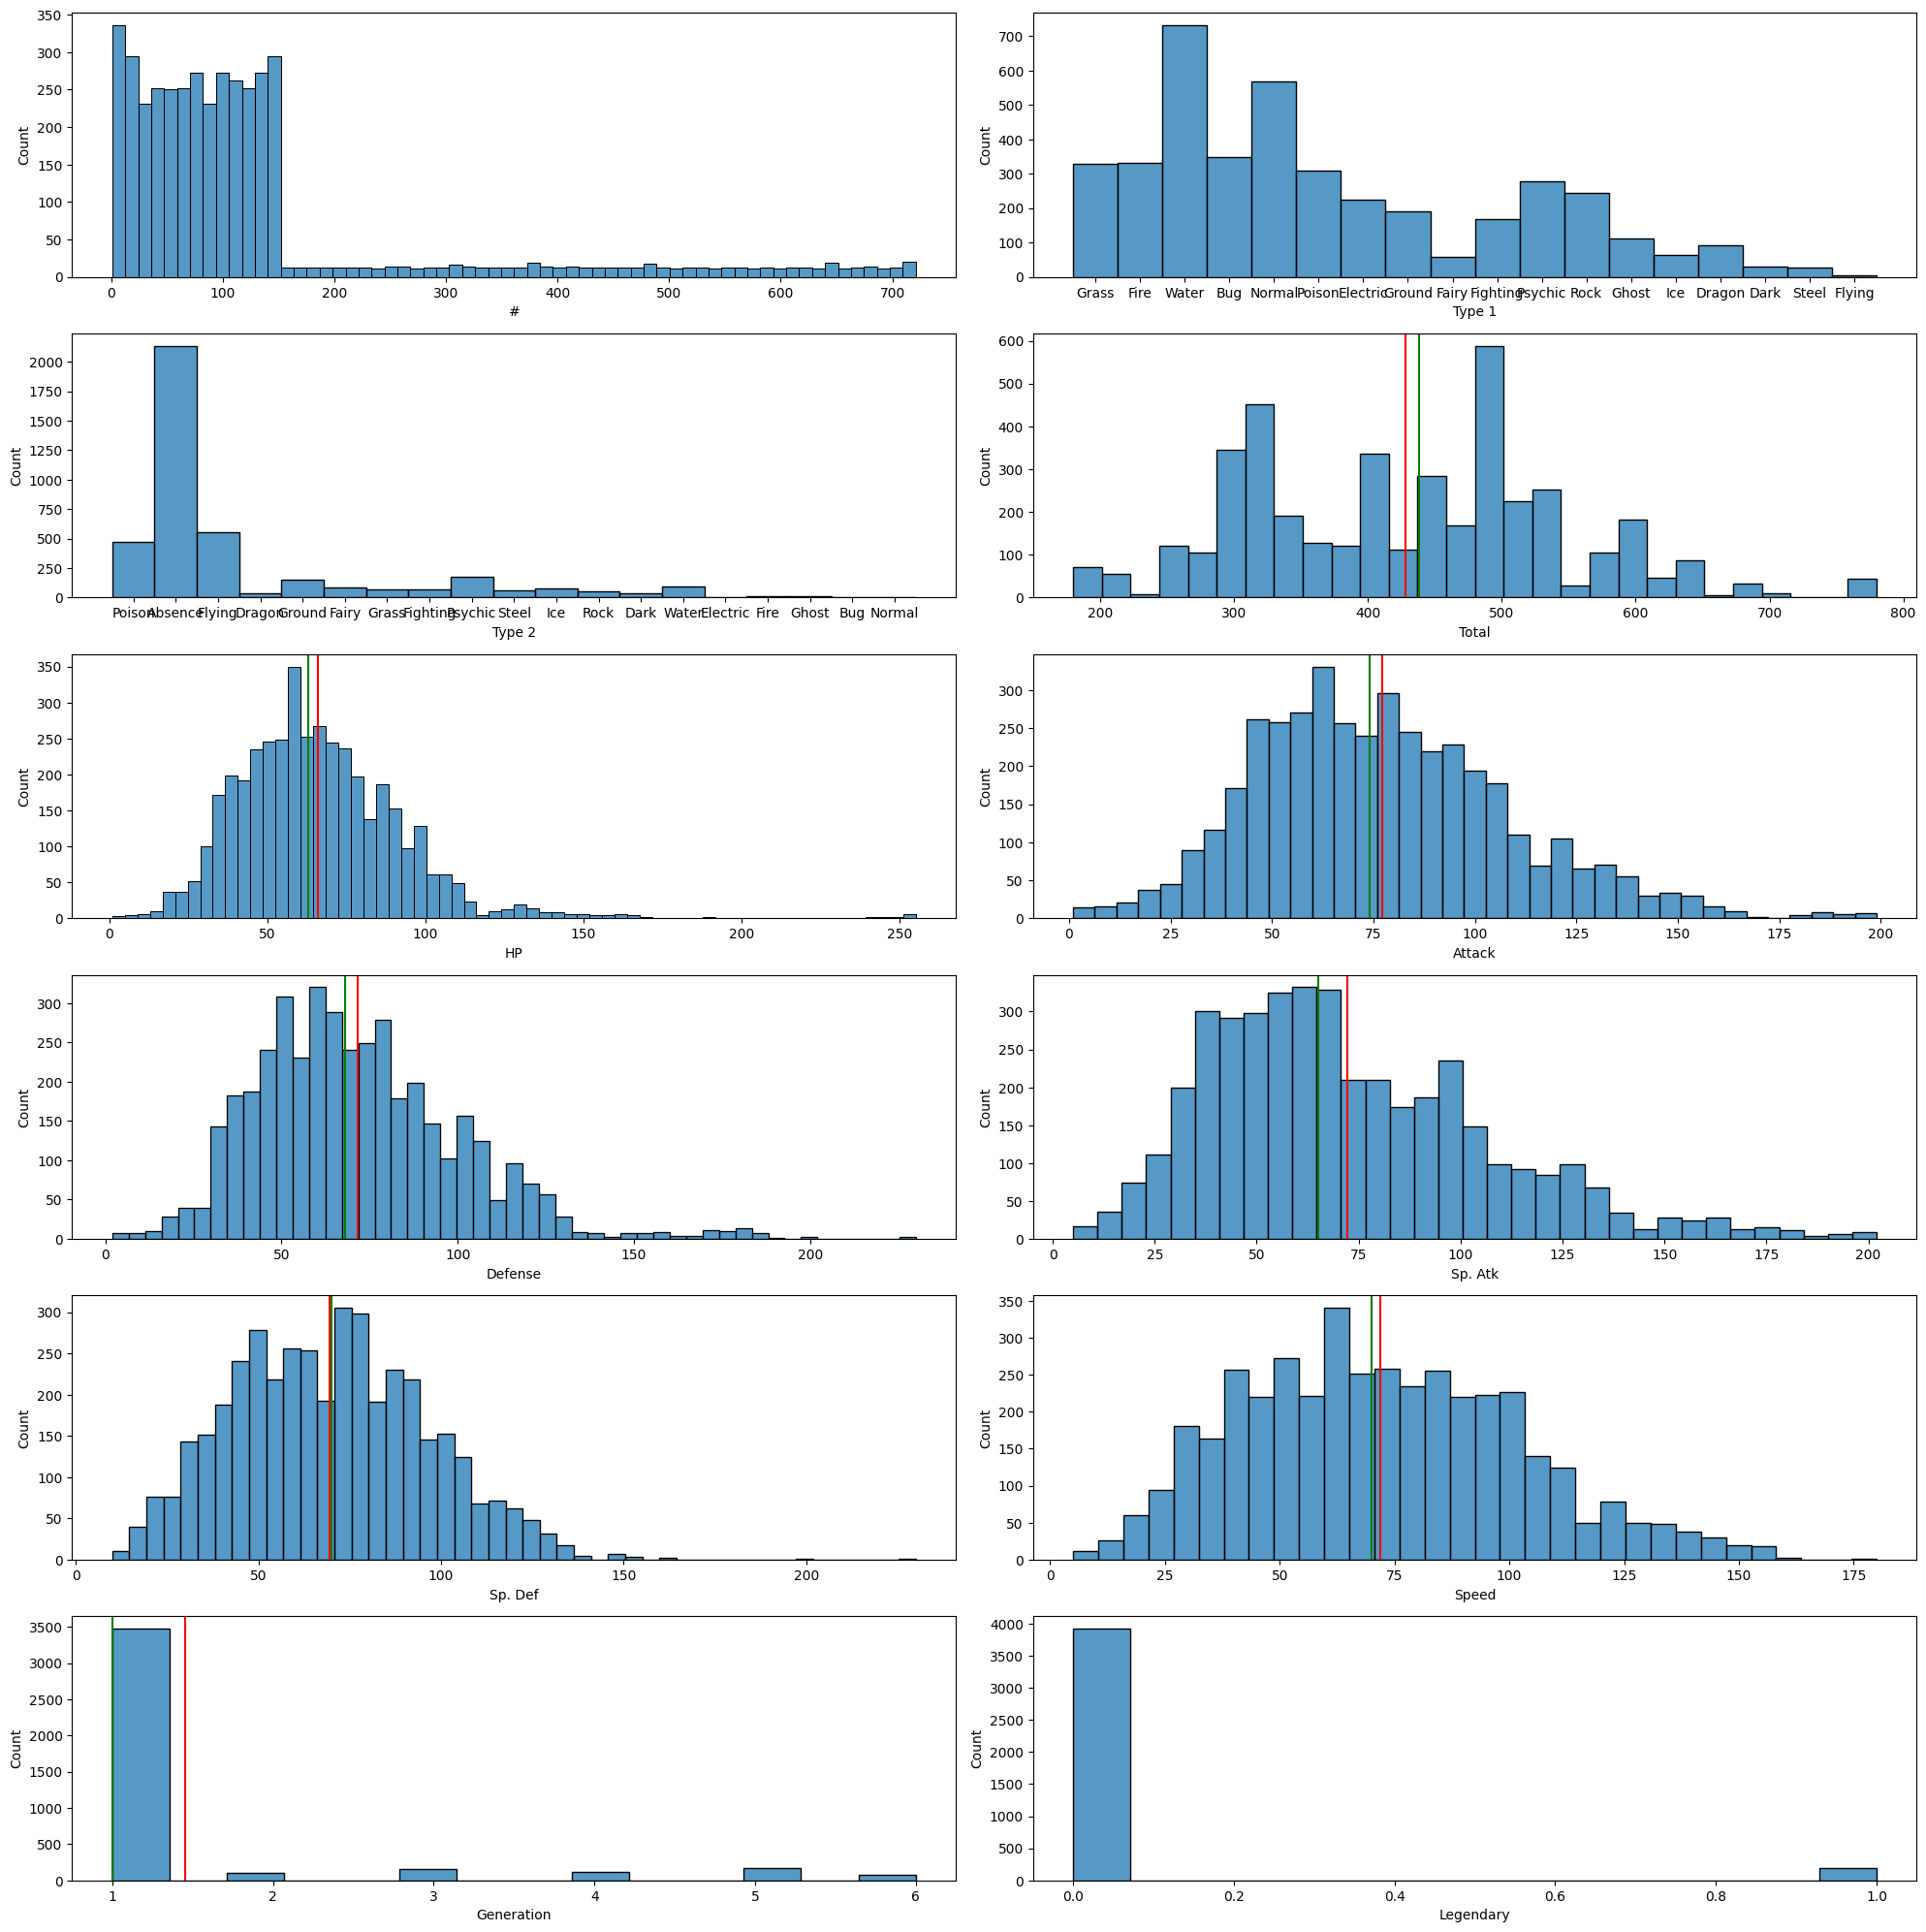

In [64]:
plt.figure(figsize=(20, 20))
columns = [column for column in df.columns if column != 'Name']
num_col = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed','Generation']
for i, column in enumerate(columns):
    plt.subplot(6, 2, i + 1)
    sns.histplot(data=df_full, x=column)
    if column in num_col:
        mean = np.mean(df_full[column])
        median = np.median(df_full[column])
        plt.axvline(x=mean, color='r')
        plt.axvline(x=median, color='g')

plt.tight_layout()
plt.show()

### Wizualizacja zależności między statystykami (np. między atakiem a obroną)

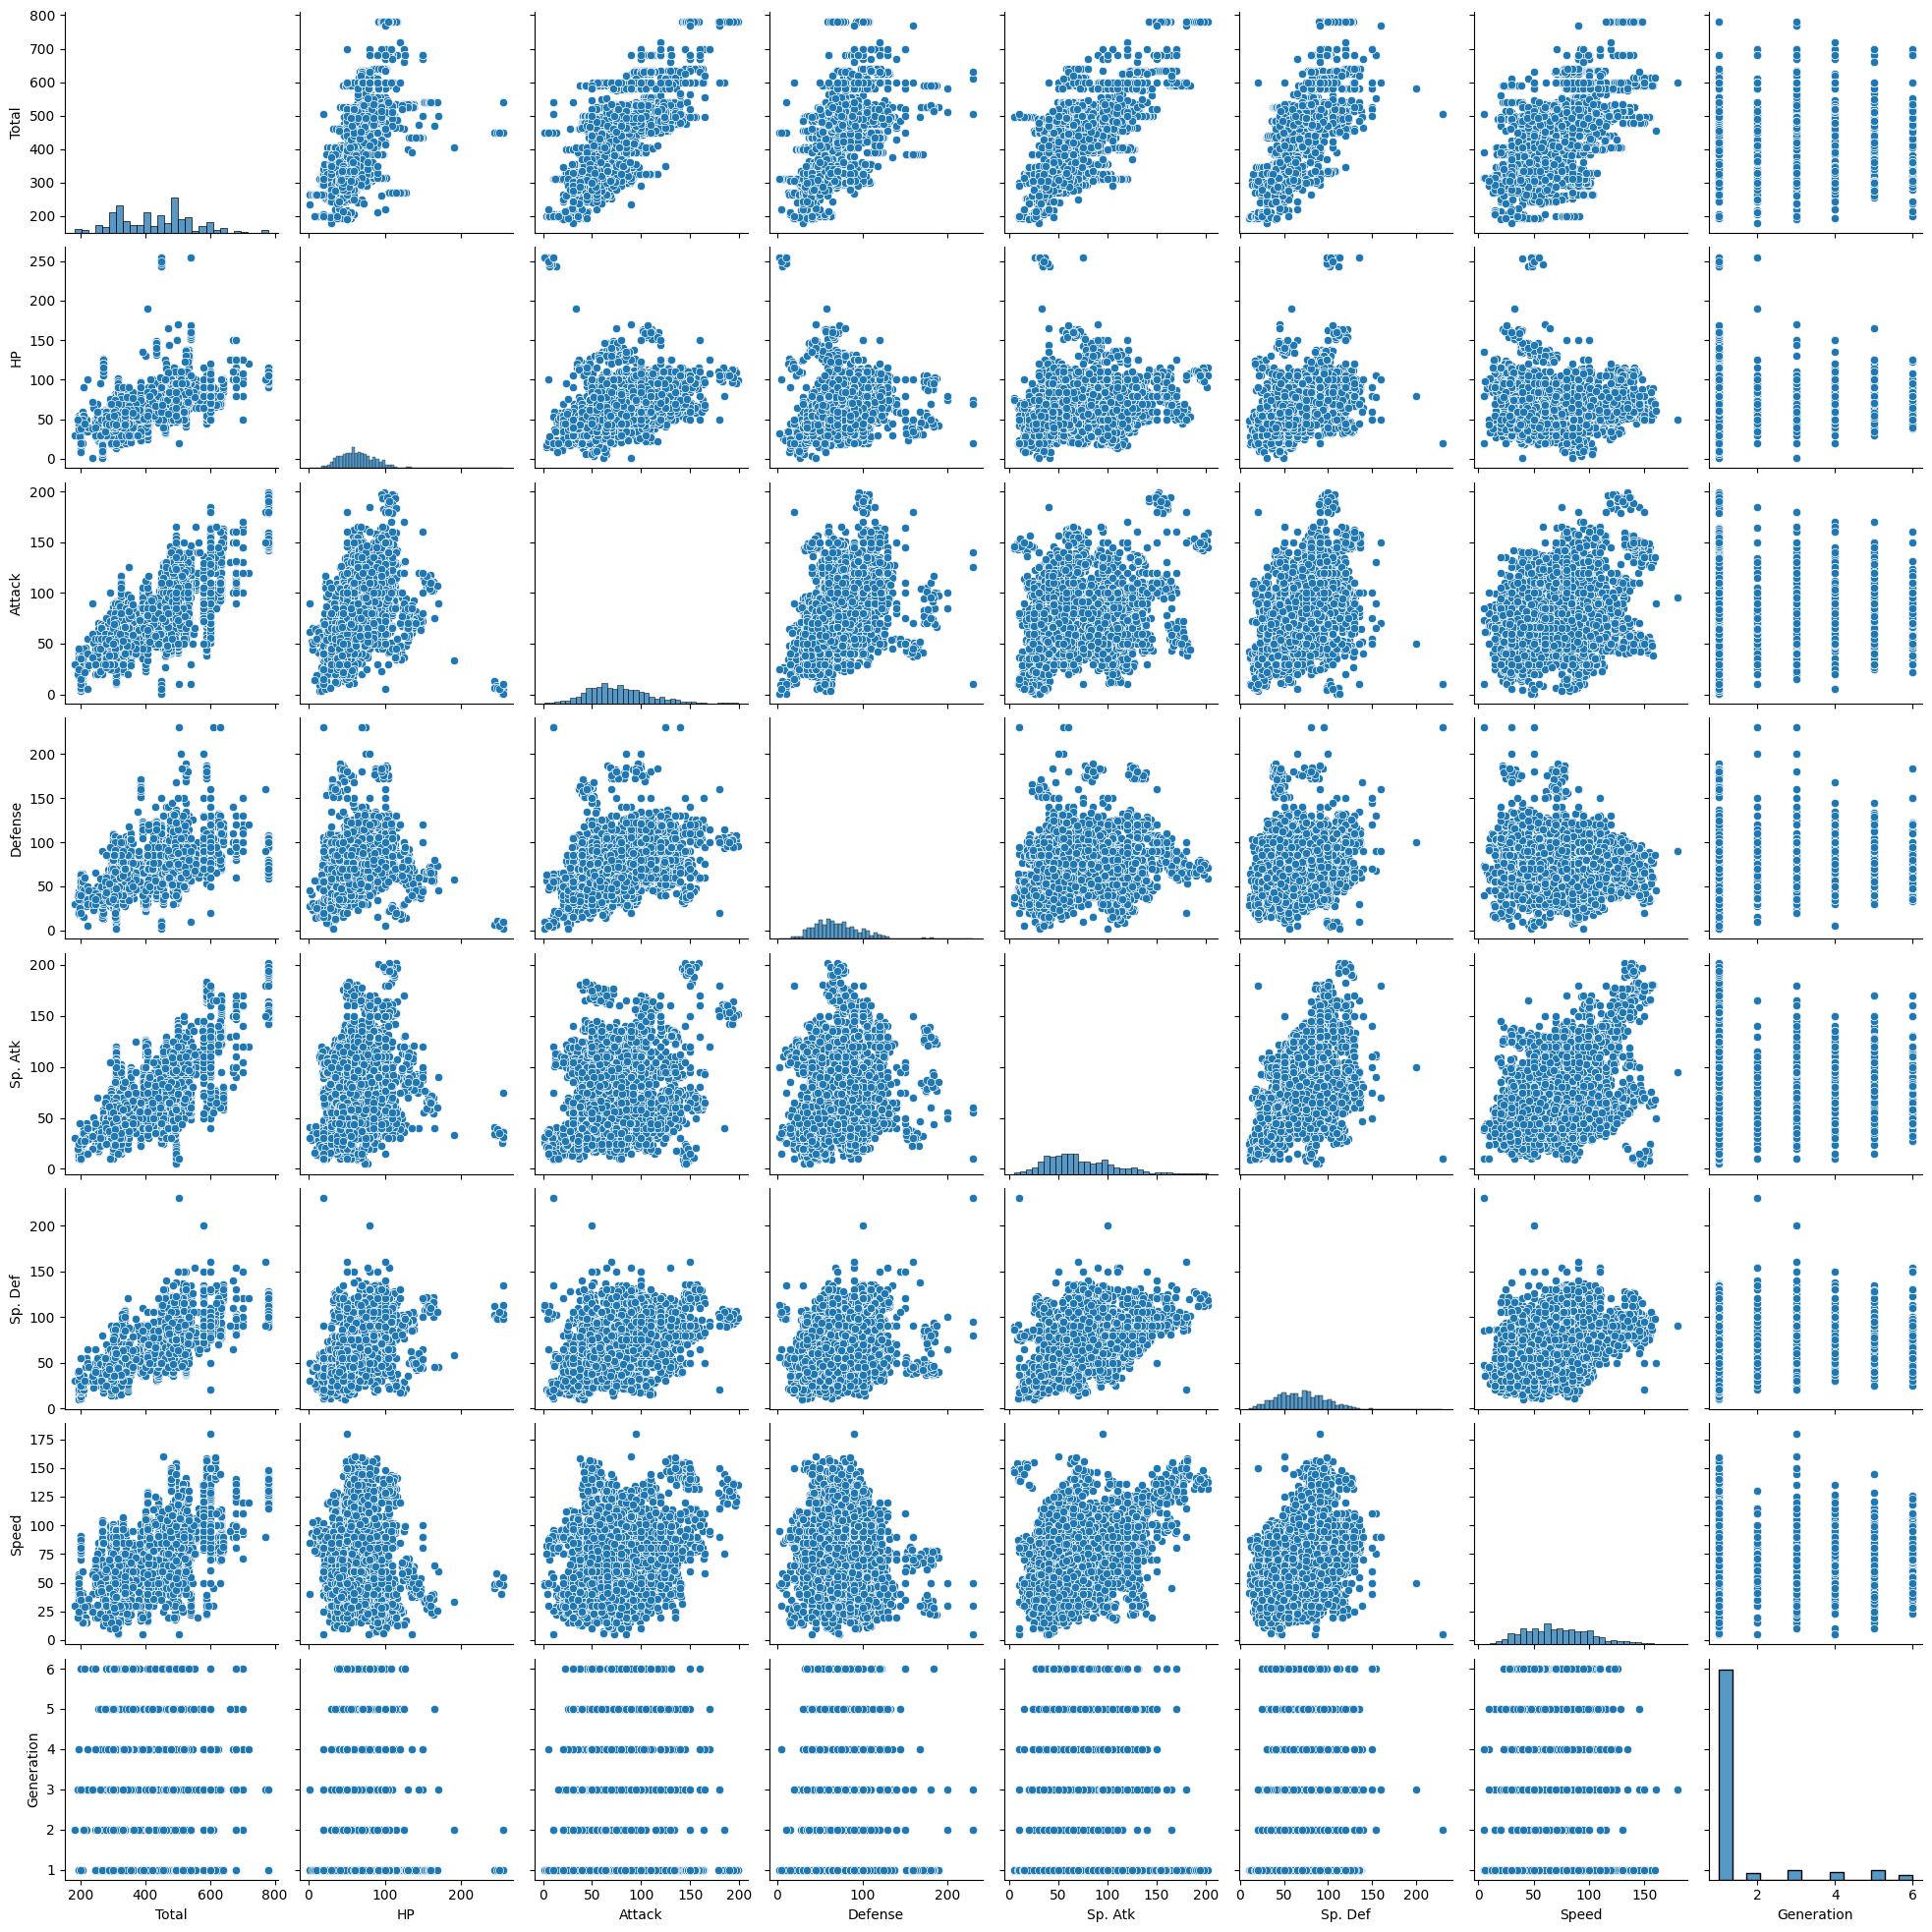

In [68]:
sns.pairplot(data=df_full[num_col])
plt.show()

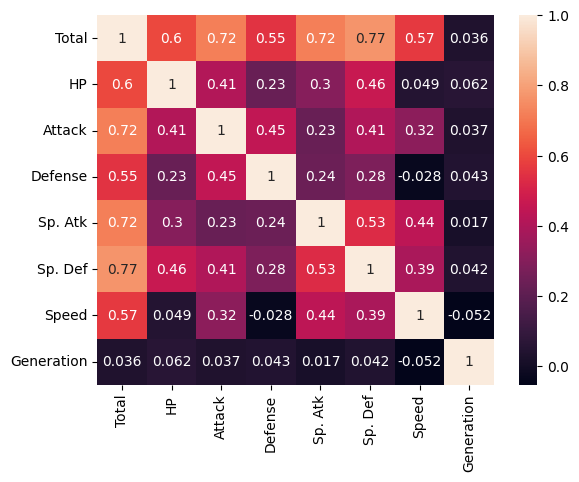

In [71]:
correlation = df_full[num_col].corr()
sns.heatmap(correlation, annot=True)
plt.show()

### Wykres liczby pokemonów dla każdego typu głównego.


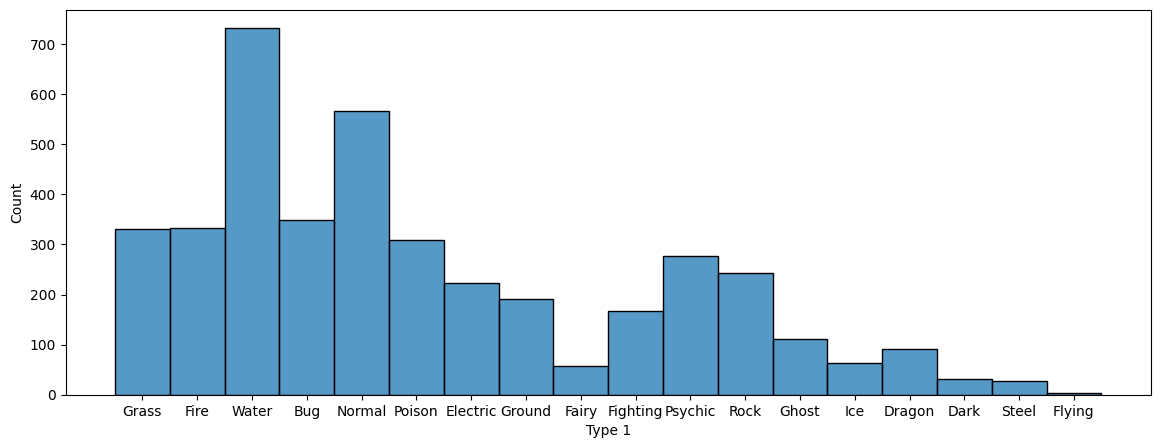

In [84]:
plt.figure(figsize=(14,5))
sns.histplot(data=df_full, x='Type 1')
plt.show()

### Wykres pokemonów z 1 lub 2 typami

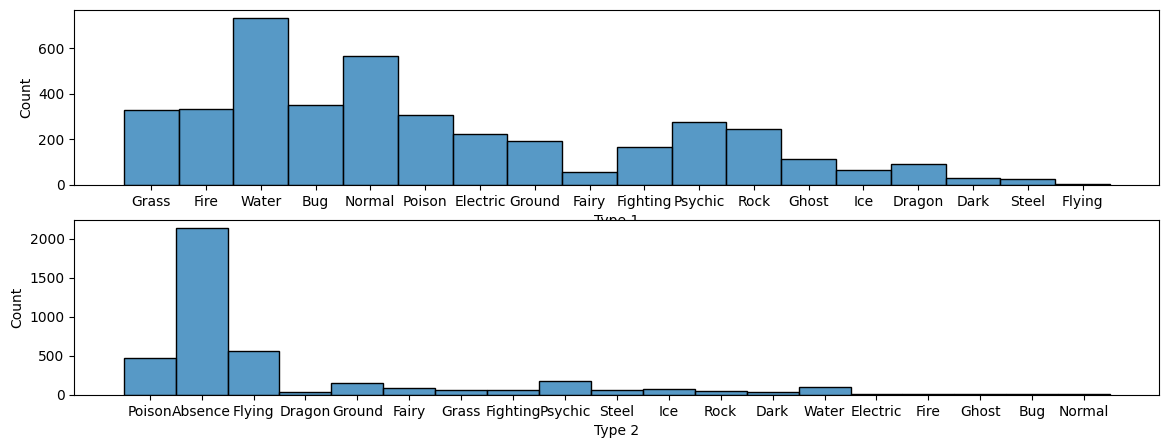

In [90]:
plt.figure(figsize=(14,5))
plt.subplot(2, 1, 1)
sns.histplot(data=df_full, x='Type 1')
plt.subplot(2, 1, 2)
sns.histplot(data=df_full, x='Type 2')
plt.show()

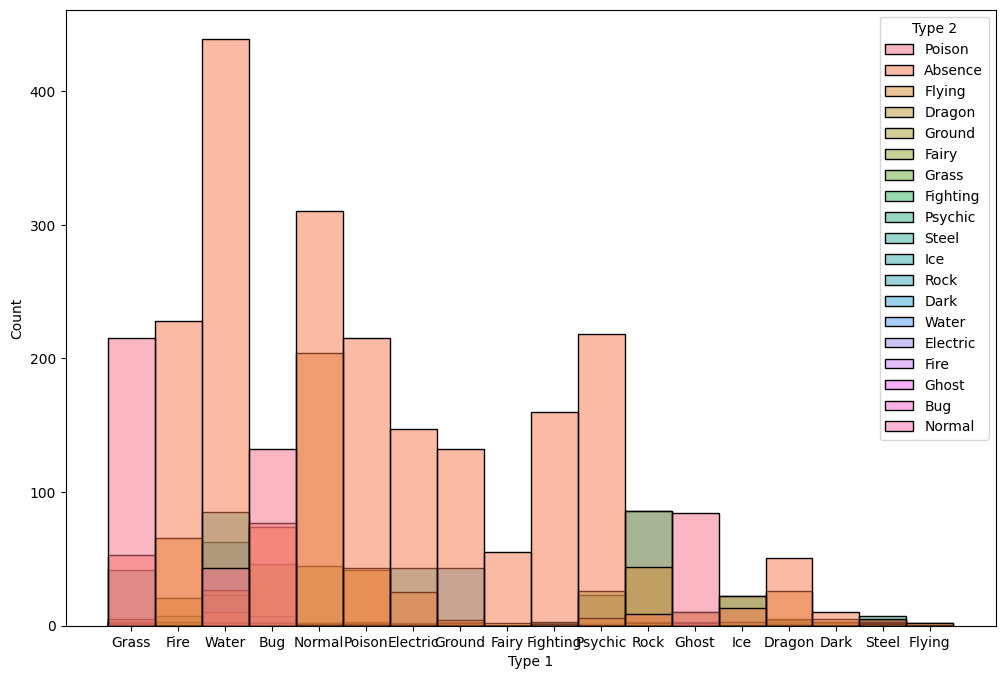

In [98]:
plt.figure(figsize=(12,8))
sns.histplot(data=df_full, x='Type 1', hue='Type 2')
plt.show()

### Wykres t-SNE dla danych 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def','Speed'

In [105]:
from sklearn.manifold import TSNE
columns = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def','Speed']

tsne = TSNE()
results = tsne.fit_transform(df_full[columns])
results

array([[-38.751255 , -12.798141 ],
       [-34.00097  ,  -9.6149645],
       [-37.49575  ,  -3.7729685],
       ...,
       [ 62.758644 , -30.07712  ],
       [ 63.692055 , -29.093027 ],
       [ 69.025795 ,  -7.946965 ]], dtype=float32)

In [126]:
tsne_result_df = pd.DataFrame({'tsne_1': results[:,0], 'tsne_2': results[:,1], 'T1' : df_full['Type 1'], 'T2' : df_full['Type 2'],
                              'Gen' : df_full.Generation, 'Legend' : df_full.Legendary})
tsne_result_df.head()

,tsne_1,tsne_2,T1,T2,Gen,Legend
0,-38.751255,-12.798141,Grass,Poison,1,False
1,-34.000969,-9.614964,Grass,Poison,1,False
2,-37.495750,-3.772969,Grass,Poison,1,False
3,-34.476742,-10.193457,Grass,Poison,1,False
4,-32.241402,11.584271,Grass,Poison,1,False


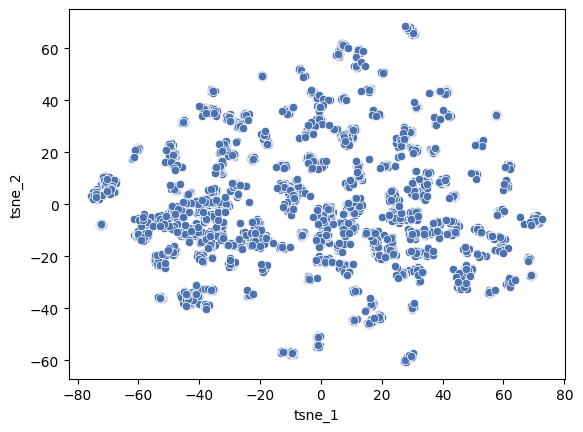

In [114]:
sns.scatterplot(data=tsne_result_df, x='tsne_1', y='tsne_2')
plt.show()

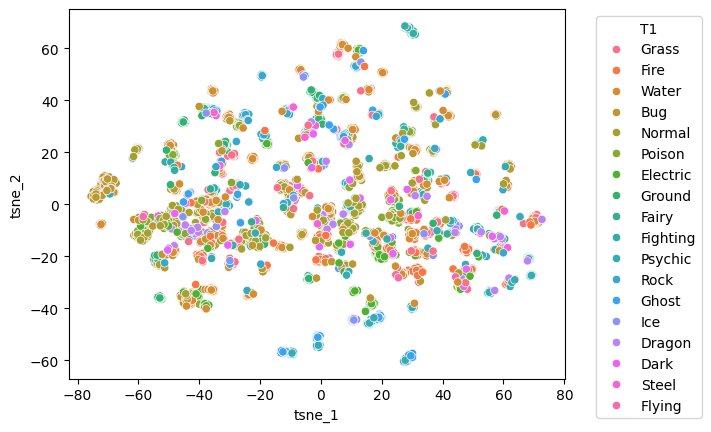

In [124]:
ax = sns.scatterplot(data=tsne_result_df, x='tsne_1', y='tsne_2', hue='T1', legend='brief')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1.05, 1))
plt.show()

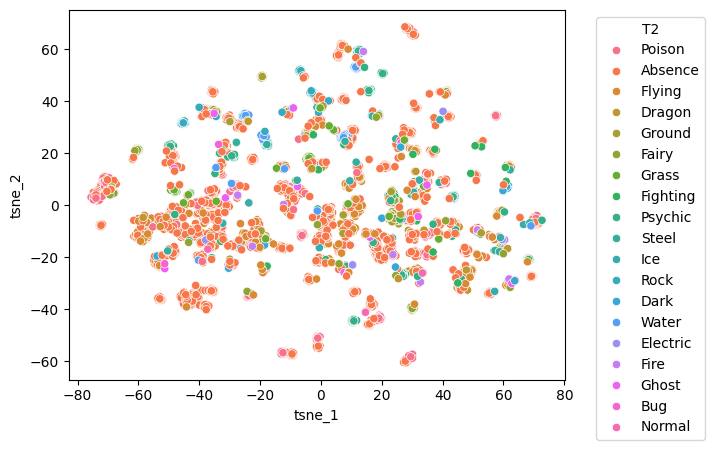

In [125]:
ax = sns.scatterplot(data=tsne_result_df, x='tsne_1', y='tsne_2', hue='T2')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1.05, 1))
plt.show()

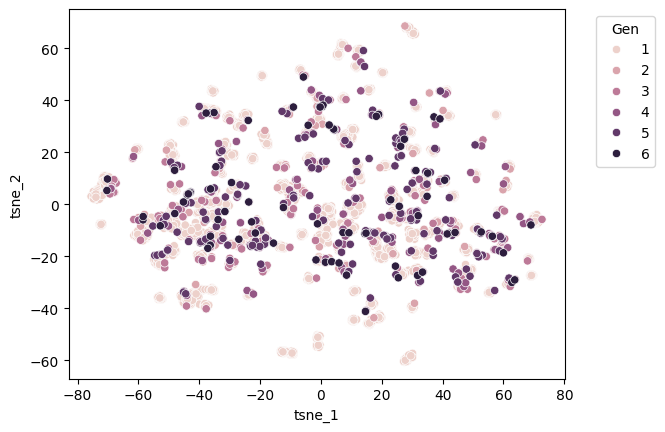

In [127]:
ax = sns.scatterplot(data=tsne_result_df, x='tsne_1', y='tsne_2', hue='Gen')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1.05, 1))
plt.show()

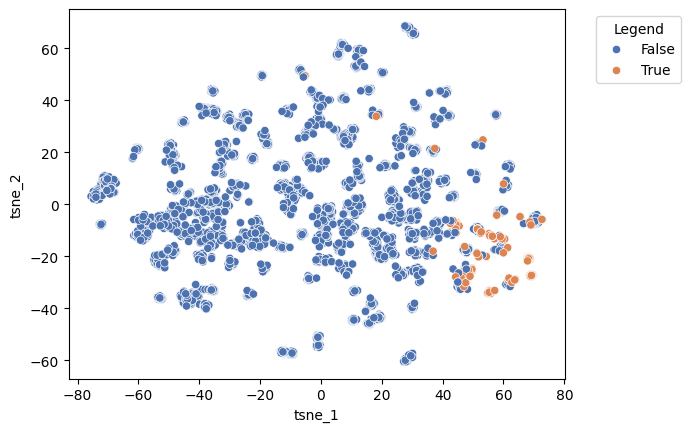

In [128]:
ax = sns.scatterplot(data=tsne_result_df, x='tsne_1', y='tsne_2', hue='Legend')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1.05, 1))
plt.show()